<a href="https://colab.research.google.com/github/garrettfenchel/WorldWealth/blob/main/Ejercicio_de_visualizaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
pip install geopandas


SyntaxError: ignored

In [78]:
pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
import pandas as pd
import geopandas as gpd
from decimal import Decimal
import mapclassify 



In [58]:
wealth = pd.read_excel("/content/drive/MyDrive/Work/Unilever/Data Science/Datasets/WorldWealth.xlsx")
wealth.rename(columns = {'Wealth ($B)':'Wealth'}, inplace = True)
wealth['Wealth'] = wealth['Wealth'].fillna(0.0).str.replace('[$,]', '').astype('float')
wealth.loc[wealth["Country"] == "United States", "Country"] = "United States of America"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
wealth.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  214 non-null    object 
 1   Region   206 non-null    object 
 2   Wealth   205 non-null    float64
dtypes: float64(1), object(2)
memory usage: 5.1+ KB


In [59]:
wealth

,Country,Region,Wealth
0,United States of America,North America,105990.0
1,China,China,63827.0
2,Japan,Asia-Pacific,24992.0
3,Germany,Europe,14660.0
4,United Kingdom,Europe,14341.0
...,...,...,...
209,Marshall Islands,Asia-Pacific,1.0
210,Mayotte,Africa,0.0
211,Micronesia,Asia-Pacific,0.0
212,Sao Tome and Principe,Africa,0.0


In [60]:
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(f"{type(df_world)}, {df_world.geometry.name}")

print(df_world.head())

print(df_world.geometry.geom_type.value_counts())

<class 'geopandas.geodataframe.GeoDataFrame'>, geometry
     pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
Polygon         148
MultiPolygon     29
dtype: int64


In [64]:
df_world


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


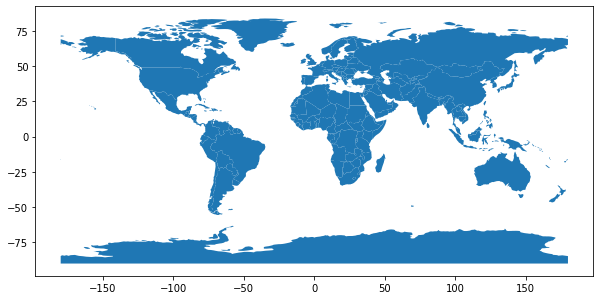

In [61]:
df_world.plot(figsize=(10,6))


In [62]:
df_world_wealth = df_world.merge(wealth, how="left", left_on=['name'], right_on=['Country'])
df_world_wealth

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Region,Wealth
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,Asia-Pacific,9.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,Africa,82.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,North America,8573.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,North America,105990.0
...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,Europe,170.0
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,Europe,26.0
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",Kosovo,Europe,36.0
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,Latin America,41.0


In [71]:
df_world_wealth["Wealth per Capita"] = (df_world_wealth["Wealth"]*1000000000)/df_world_wealth["pop_est"]
df_world_wealth

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Region,Wealth,GDP per Capita,Wealth per Capita
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,Asia-Pacific,9.0,0.000010,9772.644847
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,Africa,82.0,0.000002,1519.899516
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,North America,8573.0,0.000241,240654.530919
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,North America,105990.0,0.000324,324499.788200
...,...,...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,Europe,170.0,0.000024,23906.542855
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,Europe,26.0,0.000040,40463.777138
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",Kosovo,Europe,36.0,0.000019,18994.855560
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,Latin America,41.0,0.000034,33655.993065


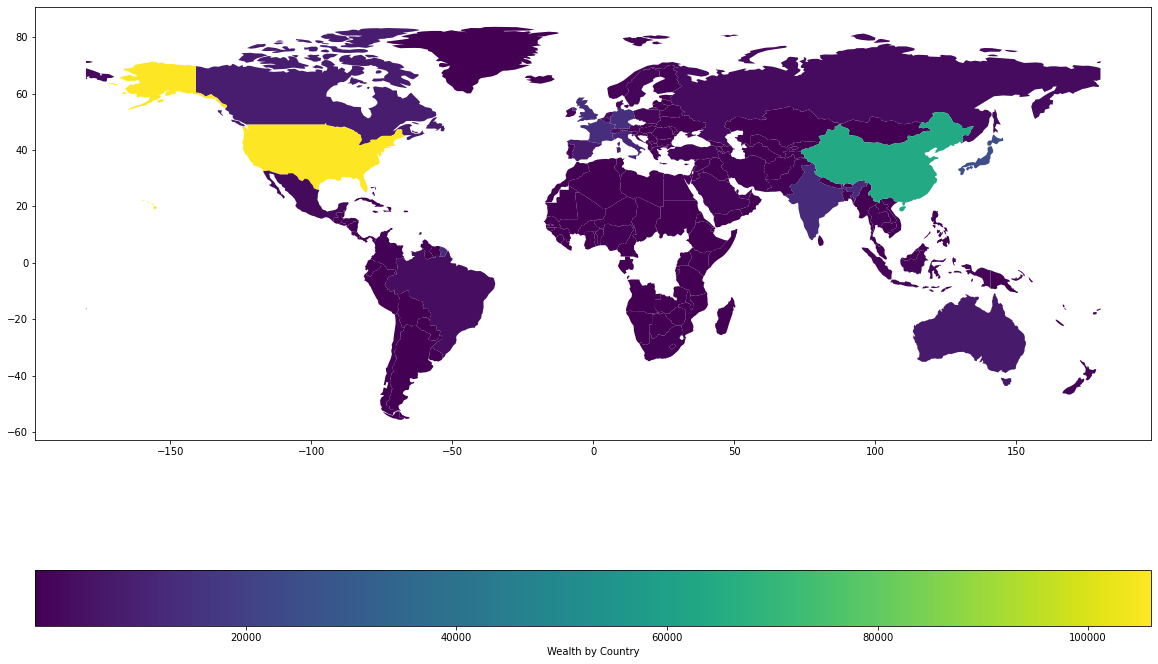

In [72]:
df_world_wealth.plot(column="Wealth", legend = True,
           legend_kwds={'label': "Wealth by Country",
                        'orientation': "horizontal"},
                     figsize = (20,16))



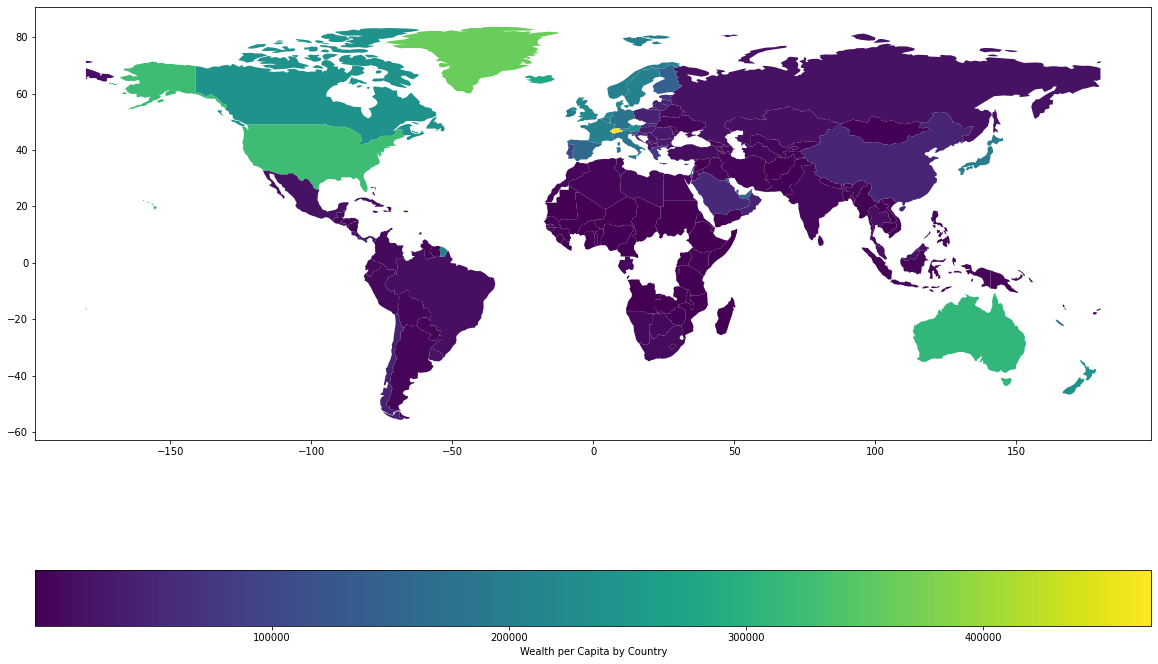

In [73]:
df_world_wealth.plot(column="Wealth per Capita", legend = True,
           legend_kwds={'label': "Wealth per Capita by Country",
                        'orientation': "horizontal"},
                     figsize = (20,16))

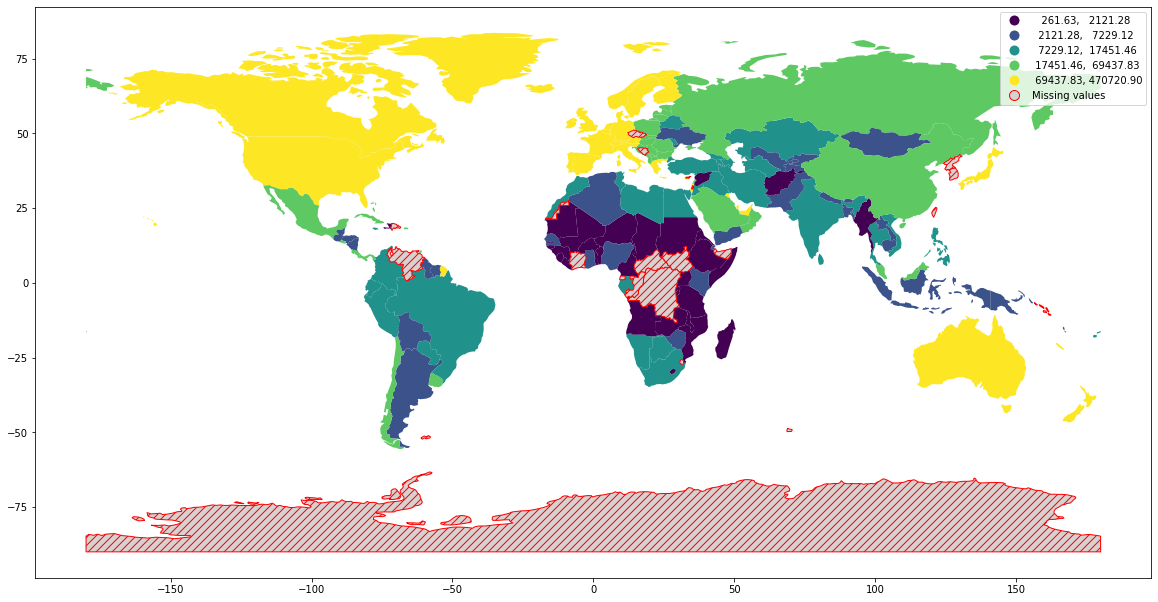

In [82]:
df_world_wealth.plot(column="Wealth per Capita", 
                     legend = True,
                     figsize = (20,16),
                     scheme = "quantiles",
                     missing_kwds = {
                            "color": "lightgrey",
                            "edgecolor": "red",
                            "hatch": "///",
                            "label": "Missing values",}
)